In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/2019-2020 NSCH_Topical_CAHMI_DRC_1920.csv')

In [3]:
by_gender = df[df['AutismInd_1920'] != 95]
by_gender = df[df['AutismInd_1920'] != 99]
by_gender = df[df['AutismInd_1920'] != 2]
by_gender = df[['sex_1920','AutismInd_1920']]
by_gender.loc[by_gender['sex_1920'] == 2, 'Gender'] = 'Female'
by_gender.loc[by_gender['sex_1920'] == 1, 'Gender'] = 'Male'
by_gender.loc[(by_gender['sex_1920'] == 1) & (by_gender['AutismInd_1920'] == 3), 'No. of kids with autism'] = 'True'
by_gender.loc[(by_gender['sex_1920'] == 2) & (by_gender['AutismInd_1920'] == 3), 'No. of kids with autism'] = 'True'
by_gender = by_gender.drop(columns=['sex_1920','AutismInd_1920'])
by_gender=by_gender.groupby('Gender').count()
print(by_gender)

        No. of kids with autism
Gender                         
Female                      400
Male                       1566


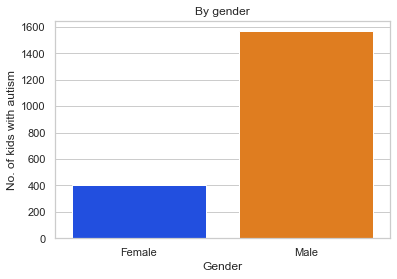

In [4]:
sns.set_theme(style='whitegrid',palette='bright')
ax = sns.barplot(x=by_gender.index, y='No. of kids with autism', data=by_gender).set(title='By gender')

In [5]:
med= df[['AutismInd_1920','MEDB10ScrQ5_1920']]
med.loc[med['AutismInd_1920'] == 3, 'Autistic'] = 'Autistic'
med.loc[med['AutismInd_1920'] == 1, 'Autistic'] = 'Not autistic'
med.loc[med['MEDB10ScrQ5_1920'] == 1, 'Mental, emotional or learning'] = 'True'
med.loc[med['MEDB10ScrQ5_1920'] == 2, 'Mental, emotional or learning'] = 'False'
med = med.drop(columns=['MEDB10ScrQ5_1920','AutismInd_1920'])
med = med.groupby('Autistic').count()
med.head()

,"Mental, emotional or learning"
Autistic,
Autistic,1966
Not autistic,61018


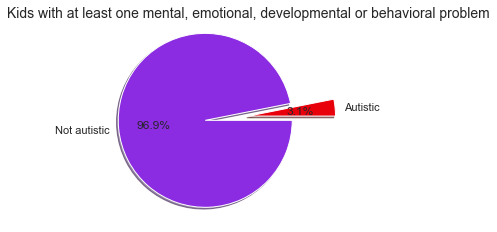

In [6]:
colors = sns.color_palette('bright')[3:6]

plt.pie(med['Mental, emotional or learning'],labels=med.index, colors=colors, explode=(0,0.5),shadow=True, autopct='%1.1f%%')
plt.title('Kids with at least one mental, emotional, developmental or behavioral problem', fontsize=14, pad=-10)
plt.show()

In [10]:
new = df[['DrAskConc_1920','nom17_3ASD_1920','BehavSev_1920','DevDelSev_1920','LearnSev_1920','AutismSev_1920','cntdiff']]
new.head()

,DrAskConc_1920,nom17_3ASD_1920,BehavSev_1920,DevDelSev_1920,LearnSev_1920,AutismSev_1920,cntdiff
0,90,3,1,1,1,1,0
1,2,3,1,1,1,1,0
2,90,3,1,1,1,1,0
3,90,3,1,1,1,1,0
4,1,3,1,1,1,1,0
